# 1차원 데이터
- 평균값(기대값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평군을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며, 그 경향을 없애기 위한 것이 불편분산이다. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
 - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
 - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
 - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
 
# [표본분산이 분산을 과소 평가하는 이슈]
- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링 3마리 {1,2,3} 표본평균 2 
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산은 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [2]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [10]:
scores_df = pd.DataFrame({'socre':scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
scores_df

,socre
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [11]:
# 평균값
print(sum(scores)/len(scores))
print(np.mean(scores))
scores_df.mean()

55.0
55.0


socre    55.0
dtype: float64

In [12]:
# 중앙값
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [17]:
n= len(sorted_scores)
if n%2==0:
    m0=sorted_scores[n//2 -1]
    m1=sorted_scores[n//2]
    median=(m0+m1)/2
else:
    median=sorted_scores([(n+1)//2-1])
median

56.5

In [20]:
print(np.median(scores))
scores_df.median()

56.5


socre    56.5
dtype: float64

In [21]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [22]:
# 분산과 표준편차
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [39]:
# 편차
mean = np.mean(scores)
print(mean)
deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [26]:
np.mean(deviation)

0.0

In [49]:
# Q. 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.
# np.random.seed(0)
ar1=np.random.randint(1,50,size=20)
print(ar1,'\n')
m=ar1.mean()
print(m,'\n')
dev=ar1-m
print(dev,'\n')
dev.sum()


[44 24  3 35 36 31  4 19 47 36 21 18 28 15 42  2 37 11 23 44] 

26.0 

[ 18.  -2. -23.   9.  10.   5. -22.  -7.  21.  10.  -5.  -8.   2. -11.
  16. -24.  11. -15.  -3.  18.] 



0.0

분산 
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * NumPy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨. Double Degree of Freedom

In [50]:
np.mean(deviation **2) #표본분산

86.0

In [51]:
np.var(scores) #표본분산

86.0

In [54]:
scores_df.var() #불편분산

socre    95.555556
dtype: float64

In [56]:
df=scores_df.copy()
df['deviation']=deviation
df['square of deviation'] = np.square(deviation)
df

,socre,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [57]:
df.mean()

socre                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [58]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [60]:
np.std(scores,ddof=0)

9.273618495495704

In [64]:
df.std(ddof=0)

socre                   9.273618
deviation               9.273618
square of deviation    74.315543
dtype: float64

In [65]:
# 범위와 4분위수 범위
np.max(scores) - np.min(scores)

28

In [66]:
scores_Q1=np.percentile(scores,25)
scores_Q3=np.percentile(scores,75)
scores_IQR=scores_Q3 - scores_Q1
scores_IQR

15.0

In [67]:
# 요약 통계표
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [68]:
# 데이터의 정규화
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

평균: 55.0, 표준편차: 9.2736


In [73]:
# 표준화
z = (scores - np.mean(scores)) /np.std(scores)
print(z,'\n')
print(z.mean(),'\n')
print(z.std())

[-1.40182605  1.50965882  0.10783277 -1.50965882  0.21566555 -0.75482941
  1.07832773 -0.64699664  1.07832773  0.32349832] 

-1.6653345369377347e-17 

0.9999999999999999


In [75]:
z = 50+10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [76]:
scores_df['deviation_value']=z
scores_df

,socre,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [77]:
df= pd.read_csv('./data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [78]:
freq, _ = np.histogram(eng_scores, bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [81]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency' :freq}, index=pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [91]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [85]:
# 상대도수 : 해당 계급의 데이터의 상대적인 비율
rel_freq = freq / freq.sum()
rel_freq # 합은 1

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [89]:
# 누적상대도수 : 해당 계급까지의 상대도수 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [92]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [94]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']


65

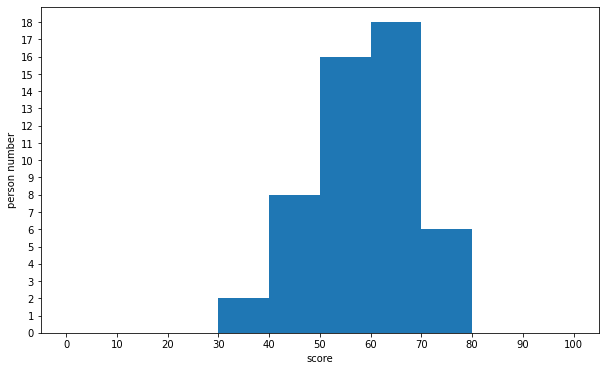

In [107]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
freq, _, _ = ax.hist(eng_scores,bins=10,range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

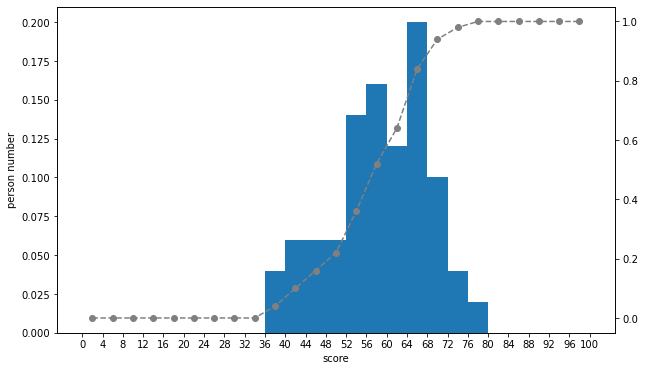

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq, _, _ = ax1.hist(eng_scores,bins=25,range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--',marker='o',color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()
plt.close()

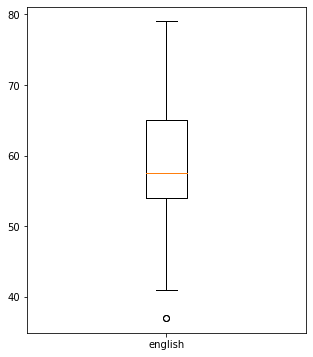

In [110]:
# 상자 그림
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['english'])
plt.show()
plt.close()

In [111]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data)
s = np.sum((data-mu)**2)/len(data)
s

1.2

In [112]:
# 불편분산
s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

1.3333333333333333

In [137]:
# [과제] 1변향 데이터 data에 대하여 평균, 표본분산, 불편분산,, 표준편차, 최대, 최소, 4분위수. 중앙값을 구하세요.
# 단 함수사용하는 경우와 사용하지 않는 경우를 모두 수행
data

# 함수 미사용
# 함수 사용
print(f'평균 :{data.mean()} \n') 
print(f'표본분산 : ') 

평균 :4.0


# 2차원 데이터

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',index_col='student number')

en_scores= np.array(df.english)[:10]
ms_scores= np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,'mathmatics':ms_scores},index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head()

,english,mathmatics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [122]:
# 공분산
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean() #편차
dfc['math_deviation'] = dfc.mathmatics - dfc.mathmatics.mean() #편차
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation'] #편차곱
dfc

,english,mathmatics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


np.cov 함수는 공분산 값을 리턴하는 게 아니라 공분산행렬을 반환한다.
1행 1열은 eng 자기 자신의 공분산 즉, eng 의 분산값을
2행 2열은 math 자기 자신의 공분산 즉, math의 분산값을 반환한다.
따라서 1행 2열 그리고 2행 1열만 두 변수의 공분산을 반환한다.


In [123]:
dfc['product of deviation'].mean() # 공분산 = 편차곱의 평균

62.8

In [124]:
# ddof 확인 요
cov_mat = np.cov(en_scores,ms_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [126]:
np.var(en_scores,ddof=0), np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [128]:
# 상관계수
np.cov(en_scores,ms_scores,ddof=0)[0,1] / (np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

In [129]:
np.corrcoef(en_scores,ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [130]:
dfc[['english','mathmatics']].corr()

,english,mathmatics
english,1.000000,0.818569
mathmatics,0.818569,1.000000


In [ ]:
# [과제] 10행 2열 2차원 배열을 생성하고 두 열간의 공분산 및 상관계수를 구하세요.
# 단, numpy, pandas 두가지 방식으로 모두 수행

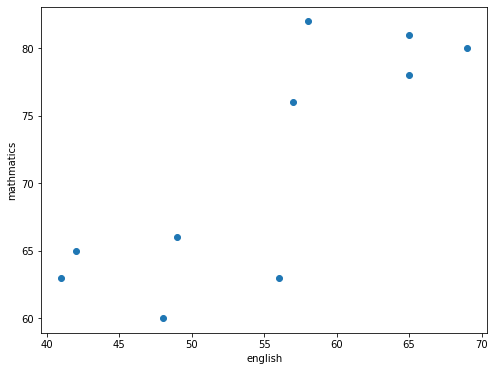

In [134]:
# 산점도
df2 = dfc[['english','mathmatics']]
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.scatter(df2.english,df2.mathmatics)
ax.set_xlabel('english')
ax.set_ylabel('mathmatics')
plt.show()
plt.close()

다항곡선 회귀분석

기본문법 : p = polyfit(x,y,n)

https://qlsenddl-lab.tistory.com/48


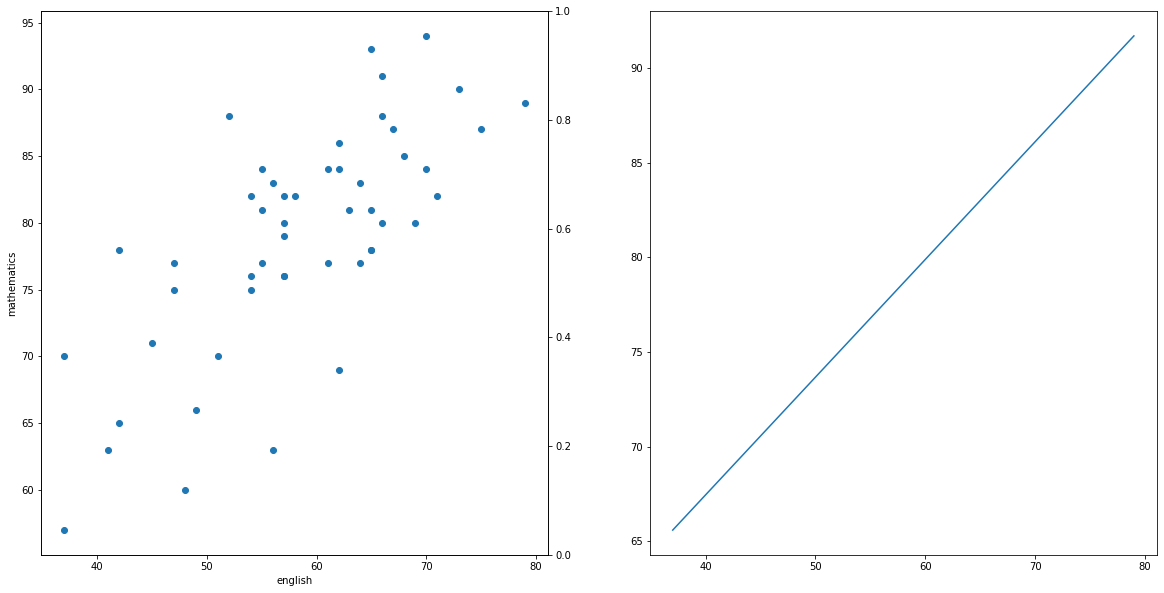

In [31]:
import matplotlib.pyplot as plt
# 회귀직선
eng_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

# 계수 구하기
poly_fit = np.polyfit(eng_scores, math_scores,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(eng_scores.min(),eng_scores.max())
ys = poly_1d(xs)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121) # 1행 2열 첫번째
ax2 = fig.add_subplot(122)
ax1.scatter(eng_scores,math_scores)
ax2.plot(xs,ys)
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')
ax2 = ax1.twinx()

plt.show()

<AxesSubplot:xlabel='english', ylabel='mathematics'>

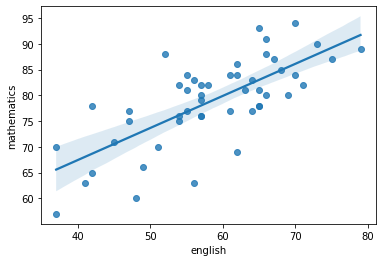

In [39]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.regplot('english',"mathematics",df,fit_reg=True)


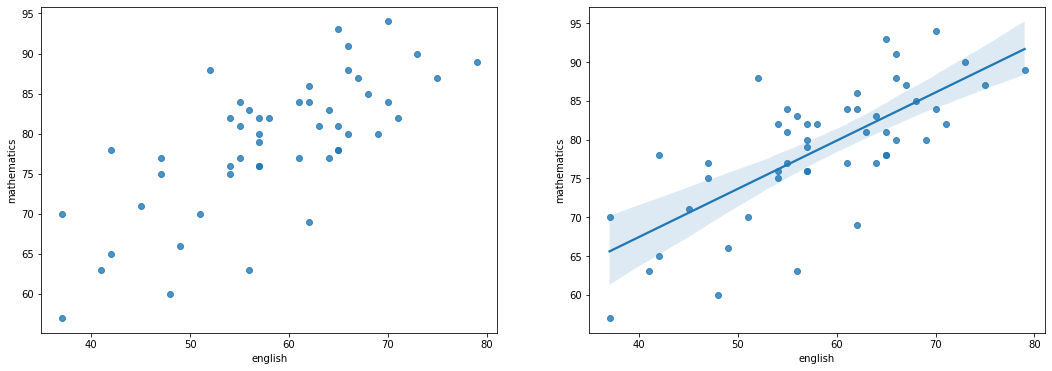

In [40]:
fig, axes = plt.subplots(1,2,figsize=(18,6),sharex=True)
sns.regplot(ax=axes[0], x=df.english, y=df.mathematics, fit_reg=False)
sns.regplot(ax=axes[1], x=df.english, y=df.mathematics,)
plt.show()

(array([[1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 1., 2., 0., 0., 0.],
       [0., 0., 0., 1., 2., 1., 1., 0.],
       [0., 1., 0., 0., 4., 6., 0., 0.],
       [0., 0., 1., 0., 2., 4., 1., 0.],
       [0., 0., 0., 0., 2., 3., 3., 2.],
       [0., 0., 0., 0., 0., 2., 0., 2.],
       [0., 0., 0., 0., 0., 0., 2., 0.]]), array([35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]), array([55., 60., 65., 70., 75., 80., 85., 90., 95.]), <matplotlib.collections.QuadMesh object at 0x000001A828DC05E0>)


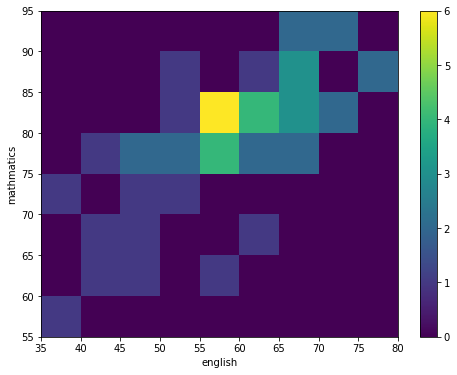

In [44]:
# 히트맵
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_scores, math_scores,
             bins=[9,8], range=[(35,80),(55,95)])
print(c)
ax.set_xlabel('english')
ax.set_ylabel('mathmatics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

In [52]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [56]:
stats_df = pd.DataFrame(index = ['X_mean','X_variance','Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])
for i,data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}',
                              f'{np.var(dataX):.2f}',
                              f'{np.mean(dataY):.2f}',
                              f'{np.var(dataY):.2f}',
                              f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                              f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


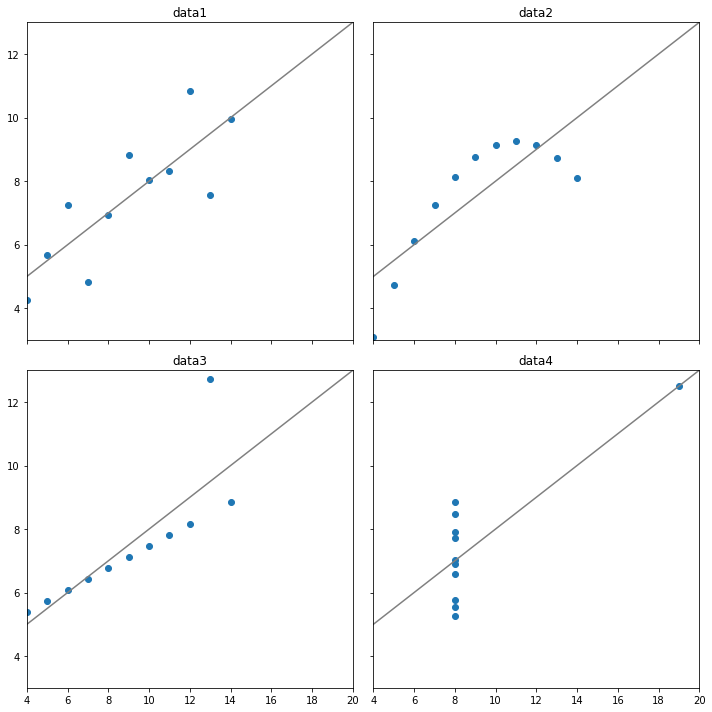

In [62]:
fit,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                       sharex=True, sharey=True)
xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax=axes[i//2,i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')
# 그래프 사이 간격 좁힘
plt.tight_layout()

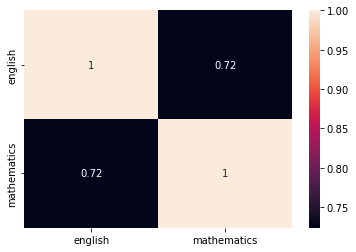

In [49]:
# Q. english와 mathematics 두 변수의 상관관계를 히트맵으로 포현하세요.
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
fdf = pd.read_csv('./data/5_2_fm.csv')
fdf

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [63]:
# Q. species 그룹별 통계량을 구하세요
grouped=fdf['length'].groupby(fdf.species)
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
A,3.0,3.0,1.0,2.0,2.5,3.0,3.5,4.0
B,3.0,8.0,2.0,6.0,7.0,8.0,9.0,10.0


In [12]:
sdf = pd.read_csv('./data/5_2_shoes.csv')
sdf

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [24]:
# Q. 각 store의 컬러별 판매량을 파악할 수 있는 피봇 테이블을 작성하세요.

pd.pivot_table(sdf,'sales','store','color')

sdf.pivot_table('sales','store','color',aggfunc='sum')

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [13]:
cdf = pd.read_csv('./data/4_cov.csv')
cdf

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [16]:
# Q. x, y의 공분산을 구하세요.
xd = cdf.x - cdf.y.mean()
yd = cdf.y - cdf.y.mean()
cdf['pod']=xd*yd
cdf.pod.mean()

6.906000000000065

In [30]:
# Q. 상관행렬을 구하세요.
cdf.corr()
np.corrcoef(cdf.x,cdf.y)

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])